In [82]:
import pandas as pd
import zipfile
from io import BytesIO
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import pickle

In [7]:
# Read and join data
def create_price_df():
    zip_path = 'MDA_Full.zip'

    data_frames = [] # One df per year

    with zipfile.ZipFile(zip_path, 'r') as z:
        for file_name in z.namelist():
            if file_name.endswith('.csv'):
                print(file_name)
                with z.open(file_name) as f:
                    df = pd.read_csv(f, encoding='ISO-8859-1')
                    data_frames.append(df)

    full_df = pd.concat(data_frames, ignore_index=True)
    df_temp = full_df[['fecha', 'hora', 'clv_nodo', 'pml']]
    wide_data = df_temp.pivot(index=['fecha', 'hora'], columns='clv_nodo')
    return full_df, wide_data

full_df, wide_data = create_wide_df()

Archive/full_pml_mda_2017.csv
__MACOSX/Archive/._full_pml_mda_2017.csv
Archive/full_pml_mda_2019.csv
__MACOSX/Archive/._full_pml_mda_2019.csv
Archive/full_pml_mda_2024.csv
__MACOSX/Archive/._full_pml_mda_2024.csv
Archive/full_pml_mda_2018.csv
__MACOSX/Archive/._full_pml_mda_2018.csv
Archive/full_pml_mda_2020.csv
__MACOSX/Archive/._full_pml_mda_2020.csv
Archive/full_pml_mda_2021.csv
__MACOSX/Archive/._full_pml_mda_2021.csv
Archive/full_pml_mda_2023.csv
__MACOSX/Archive/._full_pml_mda_2023.csv
Archive/full_pml_mda_2022.csv
__MACOSX/Archive/._full_pml_mda_2022.csv


In [56]:
# Covert to returns 
price_df = wide_data.dropna(axis=1, how='any') # Drop nodes with NaNs
price_df.replace(0, np.nan, inplace=True) # Set 0 prices to NaN
price_df.ffill(inplace=True) # Replace NaN with previous price
returns_df = price_df.pct_change().dropna()
returns_df.head()

/var/folders/p2/gnh3kld14ys4dz8h9s7bqrcw0000gp/T/ipykernel_77849/2234310747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df.replace(0, np.nan, inplace=True) # Set 0 prices to NaN
/var/folders/p2/gnh3kld14ys4dz8h9s7bqrcw0000gp/T/ipykernel_77849/2234310747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df.ffill(inplace=True) # Replace NaN with previous price


clv_nodo         01AAN-85  01AAP-85  01ACC-85  01ACM-85  01ACN-85  01ACO-230  \
fecha      hora                                                                
2017-01-01 2.0  -0.275881 -0.257758 -0.281858 -0.283003 -0.281586  -0.283437   
           3.0  -0.125205 -0.125379 -0.124734 -0.124609 -0.124735  -0.124554   
           4.0  -0.046188 -0.044566 -0.045481 -0.045389 -0.045518  -0.045326   
           5.0  -0.019732 -0.020333 -0.019367 -0.019515 -0.019618  -0.018963   
           6.0  -0.006925 -0.007349 -0.006754 -0.006795 -0.006878  -0.006400   

clv_nodo         01ACS-230  01AGU-230  01AGV-85  01AIN-115  ...  08TZM-115  \
fecha      hora                                             ...              
2017-01-01 2.0   -0.286545  -0.277616 -0.275317  -0.193527  ...  -0.248869   
           3.0   -0.124204  -0.124873 -0.126055  -0.124145  ...  -0.136335   
           4.0   -0.044804  -0.045445 -0.047049  -0.043336  ...  -0.068359   
           5.0   -0.018511  -0.019787 -0.020045  -0.021276  ...  -0.027255   
           6.0   -0.006136  -0.006888 -0.006855  -0.007983  ...  -0.012266   

clv_nodo         08UMA-115  08VAD-115  08VAD-230  08VDD-115  08XLC-115  \
fecha      hora                                                          
2017-01-01 2.0   -0.243909  -0.255694  -0.254863  -0.254966  -0.243851   
           3.0   -0.134844  -0.136683  -0.136515  -0.136687  -0.134815   
           4.0   -0.067495  -0.068968  -0.068825  -0.068908  -0.067171   
           5.0   -0.026871  -0.027115  -0.027037  -0.027171  -0.026377   
           6.0   -0.012084  -0.011985  -0.011943  -0.012044  -0.011399   

clv_nodo         08XPU-115  08XUL-115  08YXE-115  08ZNE-115  
fecha      hora                                              
2017-01-01 2.0   -0.245946  -0.239045  -0.243253  -0.243272  
           3.0   -0.135908  -0.134408  -0.135151  -0.134872  
           4.0   -0.083057  -0.067008  -0.067430  -0.067160  
           5.0   -0.025950  -0.027482  -0.026679  -0.026401  
           6.0   -0.011599  -0.011908  -0.011555  -0.011402  

[5 rows x 2153 columns]

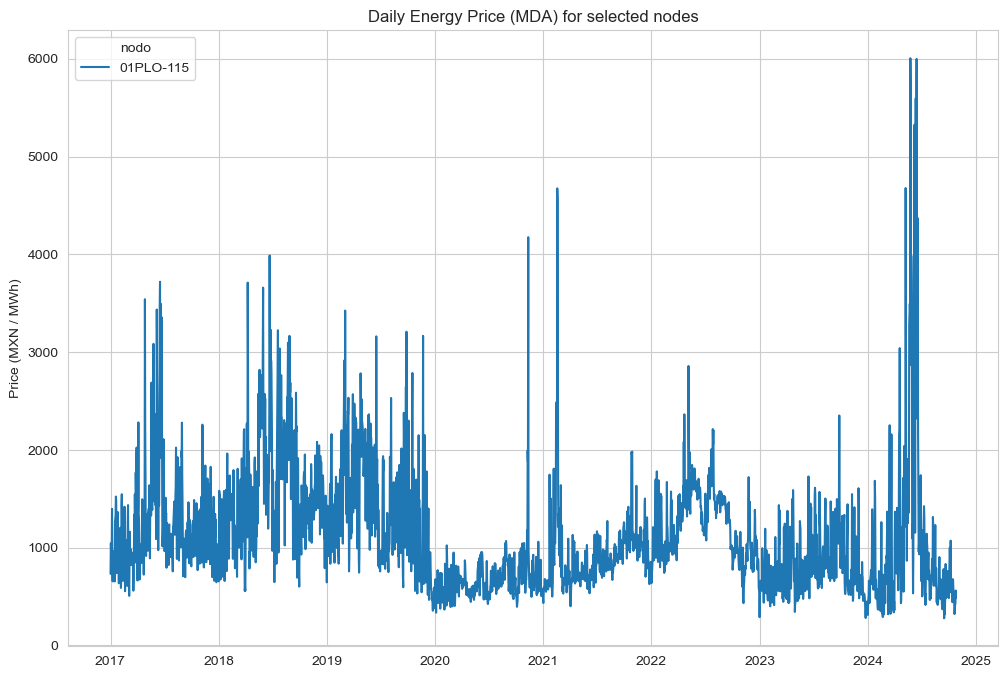

In [86]:
# Plot selected Nodes
nodos = ['01PLO-115']
df_red = price_df[nodos].reset_index()
daily_df = df_red.groupby('fecha')['01PLO-115'].mean().reset_index()
daily_df_long = daily_df.melt(id_vars='fecha', var_name='nodo', value_name='precio')
daily_df_long['fecha'] = pd.to_datetime(daily_df_long['fecha'])

# Plot series 
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.lineplot(data=daily_df_long, x='fecha', y='precio', hue='nodo')
plt.xlabel('')
plt.ylabel('Price (MXN / MWh)')
plt.title('Daily Energy Price (MDA) for selected nodes')
plt.show()

In [81]:
# Node matching 
price_df_new = price_df.reset_index()
price_df_new['fecha'] = pd.to_datetime(price_df_new['fecha'])
price_df_long = price_df_new.melt(id_vars=('fecha', 'hora'), var_name='nodo', value_name='precio')

# Catalogo
catalogo = pd.read_csv('Catalogo_Nodos.csv')
cat_red = catalogo[['SISTEMA', 'CENTRO DE CONTROL REGIONAL', 'ZONA DE CARGA', 'CLAVE', 'NOMBRE',]]
cat_red = cat_red.rename(columns={'CLAVE':'nodo'})

# Match with data
price_df_long = price_df_long.merge(cat_red, on='nodo', how='left')
price_df_long.head()


,fecha,hora,nodo,precio,SISTEMA,CENTRO DE CONTROL REGIONAL,ZONA DE CARGA,NOMBRE
0,2017-01-01,1.0,01AAN-85,1097.14,SIN,CENTRAL,CENTRO ORIENTE,Actopan
1,2017-01-01,2.0,01AAN-85,794.46,SIN,CENTRAL,CENTRO ORIENTE,Actopan
2,2017-01-01,3.0,01AAN-85,694.99,SIN,CENTRAL,CENTRO ORIENTE,Actopan
3,2017-01-01,4.0,01AAN-85,662.89,SIN,CENTRAL,CENTRO ORIENTE,Actopan
4,2017-01-01,5.0,01AAN-85,649.81,SIN,CENTRAL,CENTRO ORIENTE,Actopan
